In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/alzheimers_disease_data.csv")

# Preview
df.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


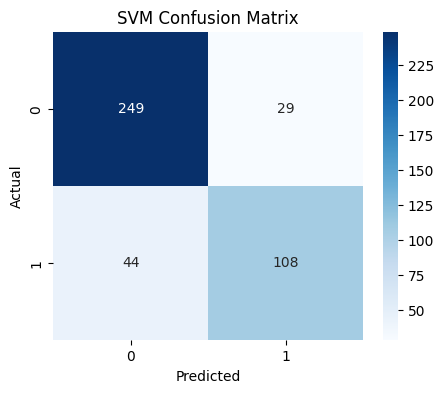

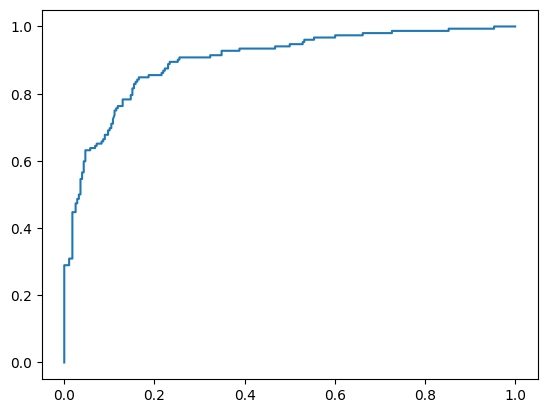

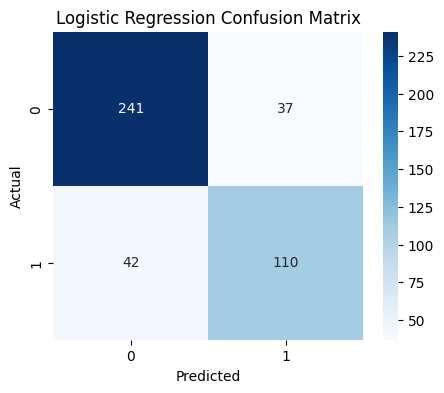

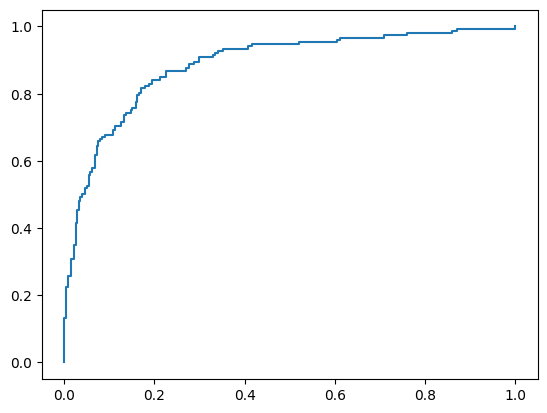

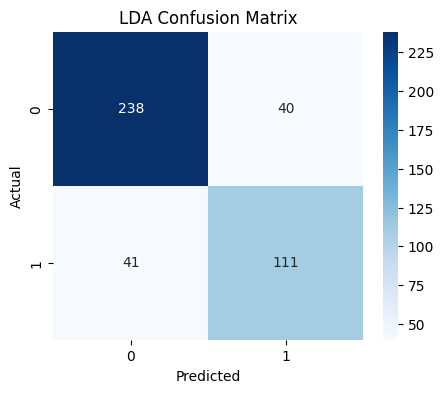

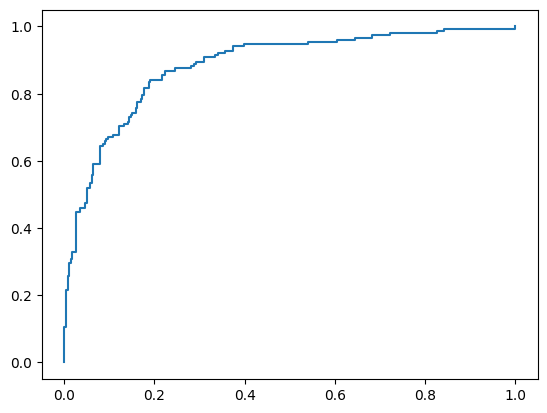

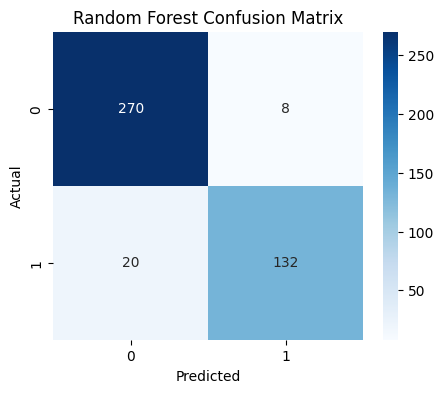

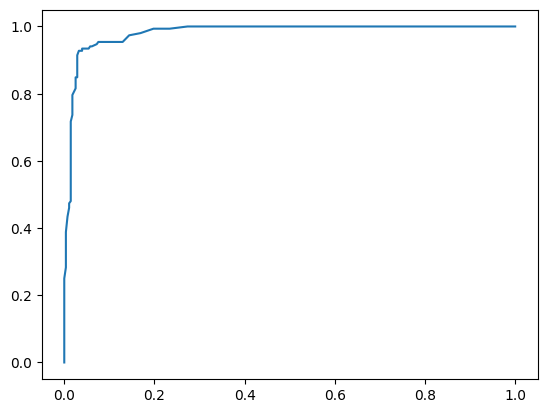

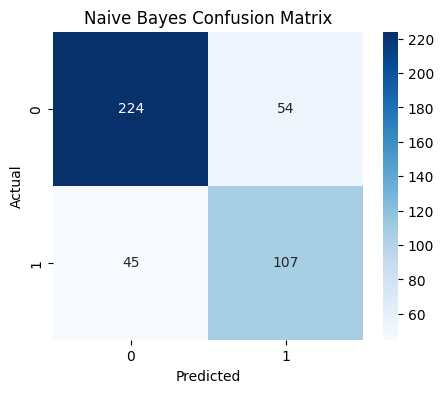

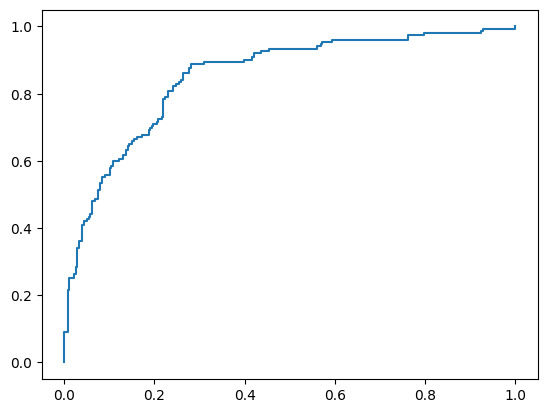

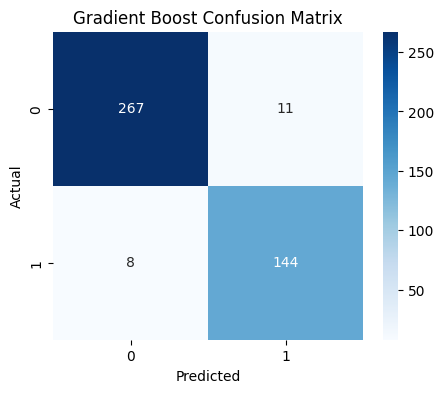

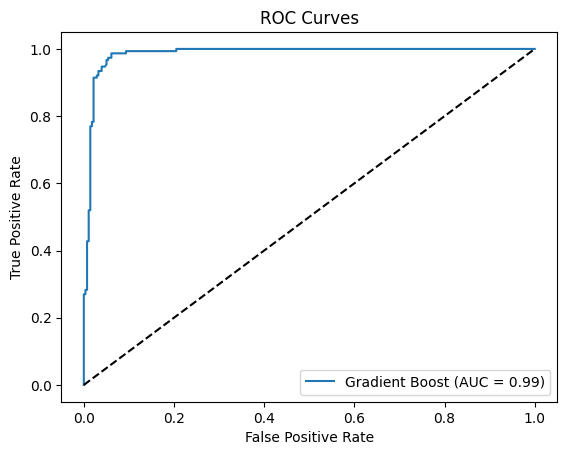

Model                Accuracy   Precision  Recall     F1 Score  
------------------------------------------------------------
SVM                  0.8302     0.8281     0.8302     0.8281    
Logistic Regression  0.8163     0.8151     0.8163     0.8156    
LDA                  0.8116     0.8114     0.8116     0.8115    
Random Forest        0.9349     0.9352     0.9349     0.9342    
Naive Bayes          0.7698     0.7733     0.7698     0.7712    
Gradient Boost       0.9558     0.9561     0.9558     0.9559    


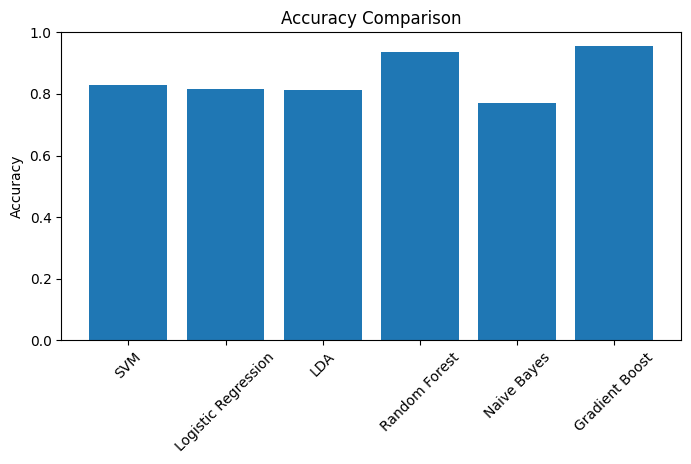

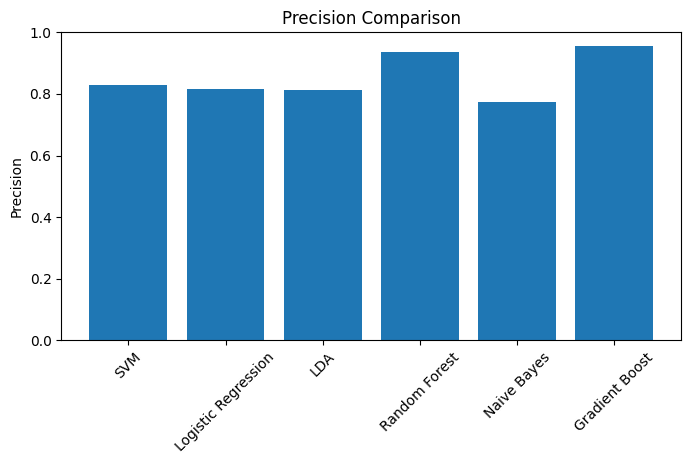

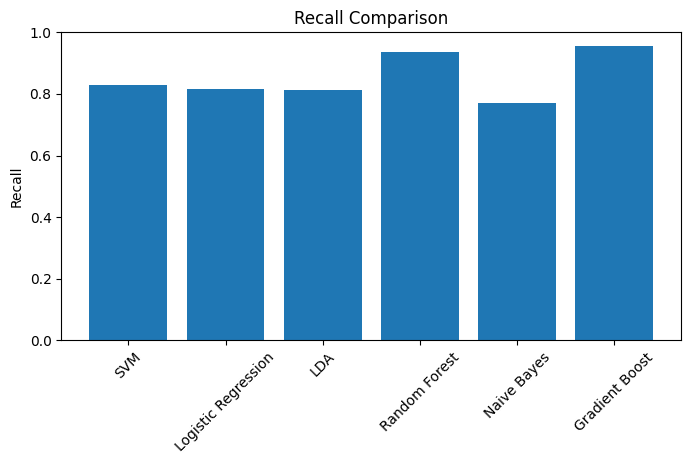

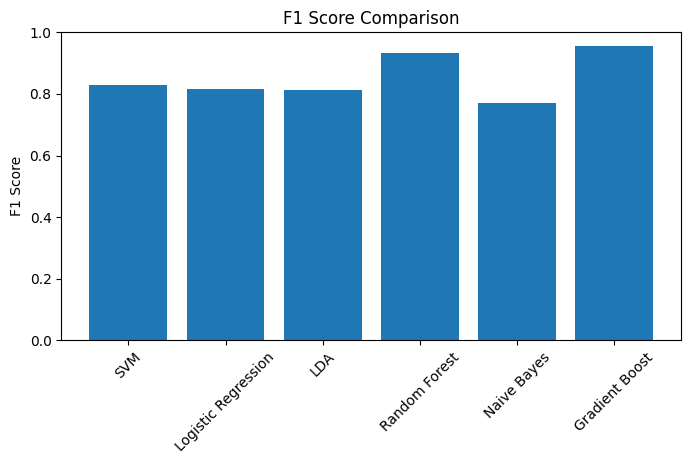

In [ ]:
# Enhanced Alzheimer’s Disease ML Pipeline

## Step 1: Load Dataset
import pandas as pd

df = pd.read_csv("/content/alzheimers_disease_data.csv")
df.columns = df.columns.str.strip()
df = df.dropna()

## Step 2: Preprocessing Setup
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Encode target
y = LabelEncoder().fit_transform(df["Diagnosis"])
X = df.drop("Diagnosis", axis=1)

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



## Step 3: Model Definitions
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "SVM": make_pipeline(preprocessor, SVC(probability=True)),
    "Logistic Regression": make_pipeline(preprocessor, LogisticRegression(max_iter=1000)),
    "LDA": make_pipeline(preprocessor, LinearDiscriminantAnalysis()),
    "Random Forest": make_pipeline(preprocessor, RandomForestClassifier()),
    "Naive Bayes": make_pipeline(preprocessor, GaussianNB()),
    "Gradient Boost": make_pipeline(preprocessor, GradientBoostingClassifier())
}

## Step 4: Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = [acc, prec, rec, f1]

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# Print evaluation results
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("Model", "Accuracy", "Precision", "Recall", "F1 Score"))
print("-" * 60)
for model_name, scores in results.items():
    print("{:<20} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(
        model_name, scores[0], scores[1], scores[2], scores[3]
    ))

# Bar plots of metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 4))
    plt.bar(results.keys(), [val[i] for val in results.values()])
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()



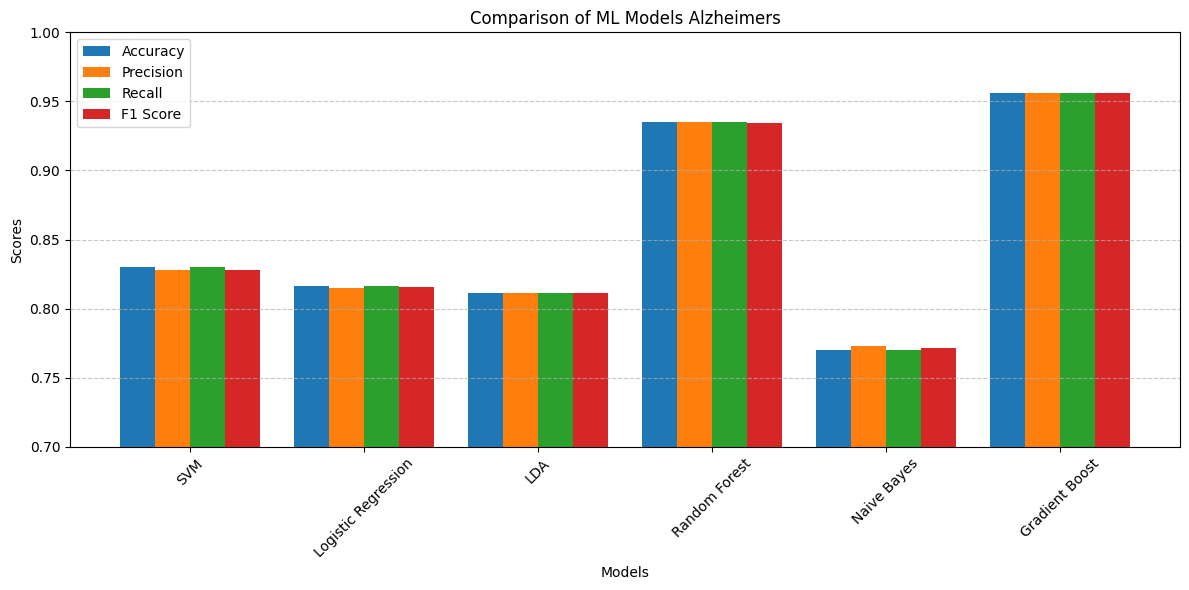

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['SVM', 'Logistic Regression', 'LDA', 'Random Forest', 'Naive Bayes', 'Gradient Boost']

# Metrics data
accuracy = [0.8302, 0.8163, 0.8116, 0.9349, 0.7698, 0.9558]
precision = [0.8281, 0.8151, 0.8114, 0.9352, 0.7733, 0.9561]
recall = [0.8302, 0.8163, 0.8116, 0.9349, 0.7698, 0.9558]
f1_score = [0.8281, 0.8156, 0.8115, 0.9342, 0.7712, 0.9559]

# Bar chart setup
x = np.arange(len(models))  # Model positions on X-axis
width = 0.2  # Width of each bar

# Create the figure
plt.figure(figsize=(12, 6))

# Plotting each metric as a separate group of bars
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1_score, width, label='F1 Score')

# Labeling and titles
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of ML Models Alzheimers')
plt.xticks(x, models, rotation=45)
plt.ylim(0.7, 1.0)  # Optional: tighten Y-axis for better visibility
plt.legend()

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipython-input-1-444862032.py:24: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


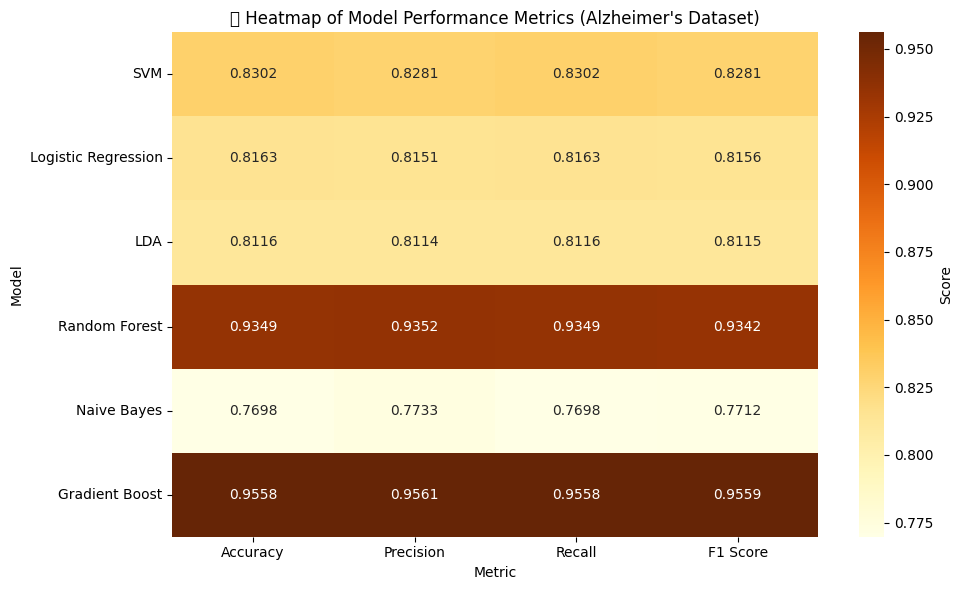

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Model performance data
data = {
    'Model': ['SVM', 'Logistic Regression', 'LDA', 'Random Forest', 'Naive Bayes', 'Gradient Boost'],
    'Accuracy': [0.8302, 0.8163, 0.8116, 0.9349, 0.7698, 0.9558],
    'Precision': [0.8281, 0.8151, 0.8114, 0.9352, 0.7733, 0.9561],
    'Recall': [0.8302, 0.8163, 0.8116, 0.9349, 0.7698, 0.9558],
    'F1 Score': [0.8281, 0.8156, 0.8115, 0.9342, 0.7712, 0.9559]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('Model', inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, fmt=".4f", cmap="YlOrBr", cbar_kws={'label': 'Score'})
plt.title("🔍 Heatmap of Model Performance Metrics (Alzheimer's Dataset)")
plt.ylabel("Model")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()
